<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numeric-Feature-Engineering" data-toc-modified-id="Numeric-Feature-Engineering-1">Numeric Feature Engineering</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span></li><li><span><a href="#Binning,-aka-Quantization" data-toc-modified-id="Binning,-aka-Quantization-3">Binning, aka Quantization</a></span></li><li><span><a href="#Why-would-you-purposely-lose-information-by-downsampling-your-data?" data-toc-modified-id="Why-would-you-purposely-lose-information-by-downsampling-your-data?-4">Why would you purposely lose information by downsampling your data?</a></span></li><li><span><a href="#2-Types-of-Transformations" data-toc-modified-id="2-Types-of-Transformations-5">2 Types of Transformations</a></span></li><li><span><a href="#Linear-Transformations" data-toc-modified-id="Linear-Transformations-6">Linear Transformations</a></span></li><li><span><a href="#Nonlinear-Transformations" data-toc-modified-id="Nonlinear-Transformations-7">Nonlinear Transformations</a></span></li><li><span><a href="#What-is-Normalization?" data-toc-modified-id="What-is-Normalization?-8">What is Normalization?</a></span></li><li><span><a href="#Common-Normalization-Techniques" data-toc-modified-id="Common-Normalization-Techniques-9">Common Normalization Techniques</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-10">Check for understanding</a></span></li><li><span><a href="#Scaling,-aka-min-max-scaling" data-toc-modified-id="Scaling,-aka-min-max-scaling-11">Scaling, aka min-max scaling</a></span></li><li><span><a href="#MinMaxScaler-&amp;-Extreme-Values" data-toc-modified-id="MinMaxScaler-&amp;-Extreme-Values-12">MinMaxScaler &amp; Extreme Values</a></span></li><li><span><a href="#Standardization,-aka-Variance-Scaling" data-toc-modified-id="Standardization,-aka-Variance-Scaling-13">Standardization, aka Variance Scaling</a></span></li><li><span><a href="#Standardization-does-NOT-change-the-type-of-distribution." data-toc-modified-id="Standardization-does-NOT-change-the-type-of-distribution.-14">Standardization does NOT change the type of distribution.</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-15">Check for understanding</a></span></li><li><span><a href="#Log-Transformation" data-toc-modified-id="Log-Transformation-16">Log Transformation</a></span></li><li><span><a href="#Transforming-a-Feature-to-be-Normally-Distributed" data-toc-modified-id="Transforming-a-Feature-to-be-Normally-Distributed-17">Transforming a Feature to be Normally Distributed</a></span></li><li><span><a href="#Quantile-Transformation-Steps" data-toc-modified-id="Quantile-Transformation-Steps-18">Quantile Transformation Steps</a></span></li><li><span><a href="#Models-that-learn-from-the-features-are-models-are-very-useful-feature-engineering" data-toc-modified-id="Models-that-learn-from-the-features-are-models-are-very-useful-feature-engineering-19">Models that learn from the features are models are very useful feature engineering</a></span></li><li><span><a href="#QuantileTransformer-is-the-best-way-to-force-a-feature-to-be-normally-distributed." data-toc-modified-id="QuantileTransformer-is-the-best-way-to-force-a-feature-to-be-normally-distributed.-20">QuantileTransformer is the best way to force a feature to be normally distributed.</a></span></li><li><span><a href="#&quot;Target&quot;-Engineering" data-toc-modified-id="&quot;Target&quot;-Engineering-21">"Target" Engineering</a></span></li><li><span><a href="#Steps-for-Target-Transformation" data-toc-modified-id="Steps-for-Target-Transformation-22">Steps for Target Transformation</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-23">Takeaways</a></span></li><li><span><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-24">Bonus Material</a></span></li></ul></div>

<center><h2>Numeric Feature Engineering</h2></center>
<br>
<center><img src="images/1_2T5rbjOBGVFdSvtlhCqlNg.png" width="100%"/></center>

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Identify common issues with numeric features
- List the common methods of numeric feature engineering.
- Compare and contrast the common methods of numeric feature engineering.

<center><h2>Binning, aka Quantization</h2></center> 

<center><img src="images/bins.png" width="70%"/></center>

Discretize continuous values into a smaller number of "bins".

The result is converting interval data to ordinal categories.

Learn more: https://blog.dominodatalab.com/feature-engineering-framework-techniques/

<center><h2>Why would you purposely lose information by downsampling your data?</h2></center>

1) Helps your goal (e.g., categorize people's age by decade for marketing).

2) Improve signal-to-noise ratio (e.g., aggregate GPS data).

Fitting a model to bins reduces the impact that small fluctuates in the data has on the model, often small fluctuates are just noise. Each bin "smooths" out the fluctuates/noises in sections of the data.

Source: https://datascience.stackexchange.com/questions/19782/what-is-the-rationale-for-discretization-of-continuous-features-and-when-should/23860#23860

In [29]:
reset -fs

In [30]:
import numpy as np

In [31]:
from sklearn.preprocessing import KBinsDiscretizer

# KBinsDiscretizer?

In [32]:
# Generate data evenly space continuous data
data = np.linspace(start=0, stop=10, num=5)
print(data)

[ 0.   2.5  5.   7.5 10. ]


In [33]:
# Bin it
est = KBinsDiscretizer(n_bins=3)
data_scaled = est.fit_transform(data.reshape(-1, 1))
# Look that the one-hot encoded categories
print(data_scaled.toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


<center><h2>2 Types of Transformations</h2></center>

<center><img src="images/lin_nonlin.jpg" width="55%"/></center>

1. Linear functions - preserves linear relationships between variables.
2. Nonlinear functions - changes the linear relationships between variables.

Image Source: https://www.researchgate.net/publication/276464597_New_techniques_for_motion-artifact-free_in_vivo_cardiac_microscopy/figures?lo=1

- Linear preserves the operations of addition and scalar multiplication
- Nonlinear does __NOT__ preserves the operations of addition and scalar multiplication 

Learn more: https://en.wikipedia.org/wiki/Linear_map

<center><h2>Linear Transformations</h2></center>

<center><img src="images/linear.png" width="75%"/></center>

Each data value is added or multiplied by the same constant.  
Examples:  Translation, rescaling, rotation, or standardization.

<center><h2>Nonlinear Transformations</h2></center>

<center><img src="images/kernel_trick1.png" width="25%"/></center>
<center><img src="images/kernel_trick2.png" width="25%"/></center>

Each data value is added or multiplied by a different value (e.g., squaring each value).  
Examples: Most kernels

<center><h2>What is Normalization?</h2></center>

"Normalization" is process that makes something more regular.

Features are often on orders of magnitude different from each other.

Normalization transforms features to be on a similar scale.

<center><h2>Common Normalization Techniques</h2></center>

- Rescale
- Standardization
- Log transform
- Transform to normal distribution

Source: https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm

<center><h2>Check for understanding</h2></center>

On your own:

Which specific machine learning algorithms are sensitive to feature scaling? What is common among them?

Which specific machine learning algorithms are __not__ sensitive to feature scaling? What is common among them?

K-nearest neighbors algorithm (k-NN) and support vector machines (SVM) are sensitive to feature scaling because k-NN use across-dimension distances and SVM learns a hyperplane.

Naive Bayes and tree-based models are __not__ sensitive to feature scaling learn because they learn features independently.

For linear regression it depends … 

For OLS and unregularized regression, rescaling is optional. Rescaling is required for gradient descent because each step is calculated relative to each dimension. Rescaling is required for regularized models because we directly comparing coefficient sizes.

<center><h2>Scaling, aka min-max scaling</h2></center>

<center><img src="images/min_max.png" width="65%"/></center>

Rescales the values into a new range, typically [0,1].  

In [34]:
reset -fs

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('always')

palette = "Dark2"
%matplotlib inline

In [58]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler?

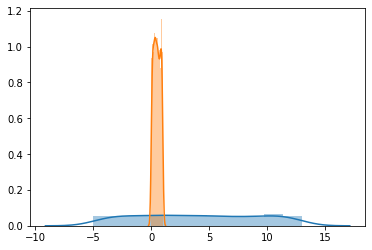

In [37]:
# Let's try it with uniform data
data = np.random.uniform(low=-5, high=13, size=1_000)
sns.distplot(data);
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

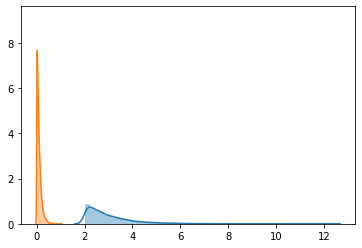

In [38]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+2
sns.distplot(data);
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

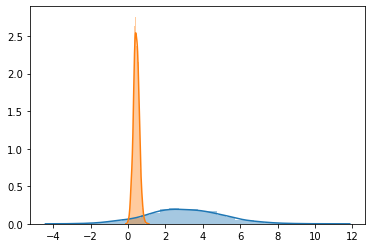

In [39]:
# Let's try it with normal data
data = np.random.normal(loc=3.0, scale=2, size=1_000)
sns.distplot(data);
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>MinMaxScaler & Extreme Values</h2></center>

MinMaxScaler often greatly compresses the data.

Thus, extreme values lose their "extremeness".

<center><h2>Standardization, aka Variance Scaling</h2></center>

Rescales data to have a mean ($\mu$) of 0 and standard deviation ($\sigma$) of 1 (unit variance).

$$ \widetilde{x} = \frac{x - x_{mean}}{x_{\sigma}} $$        



Source: https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

In [40]:
from sklearn.preprocessing import StandardScaler

# StandardScaler?

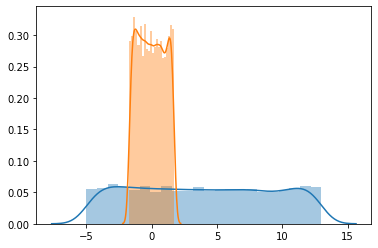

In [41]:
# Let's try it with uniform data
data = np.random.uniform(low=-5, high=13, size=10_000)
sns.distplot(data);
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

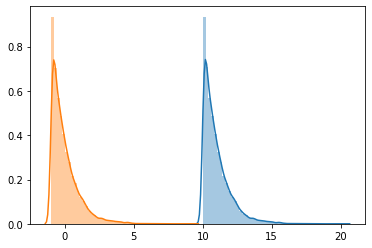

In [42]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+10
sns.distplot(data);
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

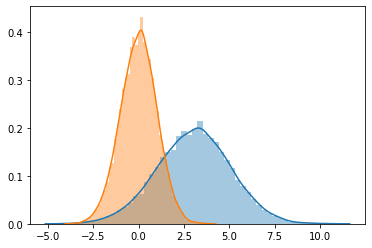

In [43]:
# Let's try it with normal data
data = np.random.normal(loc=3.0, scale=2, size=10_000)
sns.distplot(data);
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>Standardization does NOT change the type of distribution.</h2></center>

<center><h2>Check for understanding</h2></center>

Why is rescaling useful?

Creates a better shaped loss function for gradient decent and regularization

[Learn more](https://jermwatt.github.io/machine_learning_refined/notes/9_Feature_engineer_select/9_3_Scaling.html)

<center><h2>Log Transformation</h2></center>

$$ \widetilde{x} = log(x) $$  

Expands the range of small numbers.   
Compresses the range of large numbers.


Useful when the data follows a power law distribution.

Source:  https://developers.google.com/machine-learning/data-prep/transform/normalization

In [44]:
from sklearn.preprocessing import FunctionTransformer

# FunctionTransformer?

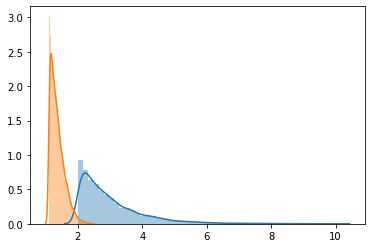

In [45]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)+2
sns.distplot(data);
transformer = FunctionTransformer(np.log1p, validate=False)
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

<center><h2>Transforming a Feature to be Normally Distributed</h2></center>

There are many, many techniques to force a empirical distribution to be normally distributed.

__Quantile Transformation__ is your true friend, a type of rank-based inverse normal transformation.

Fit a separate model for each quantile that transforms that section of data to be either be normal (or uniform).

Quantile Transformation is a non-linear transformation.

<center><h2>Quantile Transformation Steps</h2></center>

1) Calculate empirical quantiles.

2) Map the original values to a uniform distribution by estimating a transformation of the cumulative distribution function (CDF).

<center><img src="images/uniform.png" width="75%"/></center>

3) Those values are then mapped to the desired output distribution (typically normal) by translating and then inverting the CDF. 

Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. 

Sources:
    
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html
- https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/preprocessing/data.py#L2078
- https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2921808/

In [59]:
from sklearn.preprocessing import QuantileTransformer

QuantileTransformer?

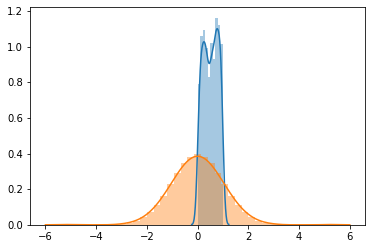

In [47]:
# Let's try it with uniform data
data = np.random.uniform(low=0, high=1, size=1_000)
sns.distplot(data);
transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

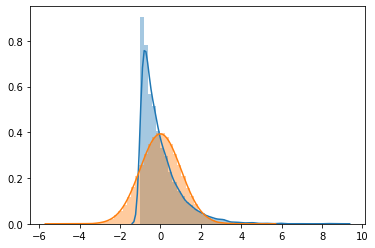

In [48]:
# Let's try it with exponential data
data = np.random.exponential(scale=1, size=10_000)-1
sns.distplot(data);
transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

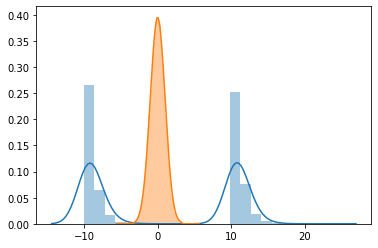

In [49]:
# Let's try it with bimodal exponential data
data_1 = np.random.exponential(scale=1, size=10_000)-10
data_2 = np.random.exponential(scale=1, size=10_000)+10
data = np.concatenate([data_1, data_2])
sns.distplot(data);
transformer = QuantileTransformer(output_distribution='normal')
data_scaled = transformer.fit_transform(data.reshape(-1, 1))
sns.distplot(data_scaled);

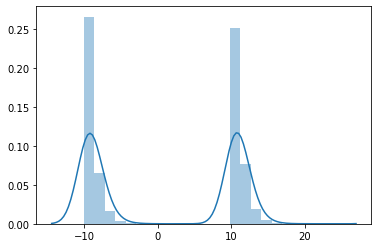

In [50]:
# Long journey back
# trans.inverse_transform?
sns.distplot(transformer.inverse_transform(data_scaled));

<center><h2>Models that learn from the features are models are very useful feature engineering</h2></center>
<br>
<br>
<center><h2>QuantileTransformer is the best way to force a feature to be normally distributed.</h2></center>

<center><h2>"Target" Engineering</h2></center>

Thus far, we have been covering __feature__ engineering. 

We might want to transform targets. For example, regression uses numeric targets.

In [51]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('always')

/Users/brian/anaconda3/envs/ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/brian/anaconda3/envs/ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/brian/anaconda3/envs/ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/brian/anaconda3/envs/ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/brian/anaconda3/envs/ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWar

In [52]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=379)
regressor = LinearRegression()

In [54]:
from sklearn.compose import TransformedTargetRegressor

regr = TransformedTargetRegressor(regressor=regressor,
                                  transformer=transformer)

raw_target_regr = LinearRegression().fit(X_train, y_train)
print(f"{'R² score':>23}")
print(f"Raw fit {raw_target_regr.score(X_test, y_test):>12.2f}")

regr.fit(X_train, y_train) 
print(f"Transformed fit {regr.score(X_test, y_test):.2f}")

               R² score
Raw fit         0.64
Transformed fit 0.67


Source: https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression

<center><h2>Steps for Target Transformation</h2></center>

1. Gather targets.
1. Visually inspect targets.
1. Decide that the targets should be transformed.
1. Let QuantileTransformer learn the transformation. 
1. Let TransformedTargetRegressor learn and predict the targets.

No need to manually keep track of scaled data.

`TransformedTargetRegressor.predict()` will return values in original scale.


It does `transformer.inverse_func(regressor.predict(X))`
Source: https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html

<center><h2>Takeaways</h2></center>

- Binning takes a numerical variable and converts to a ordinal variable.
- Normalization is a collection of techniques that transforms data to be on the same scale.
- Scaling is mapping the data from original range to a new range.
- Quantile transformation is the most effective method transform a dataset to be normally distributed.

Bonus Material
-----